#****Trying out different models:****

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#**ResNet50**

In [ ]:
# reference/main.py

from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow.keras.models import Sequential, Model

HEIGHT = 300
WIDTH = 300

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(HEIGHT, WIDTH, 3))

TRAIN_DIR = '/content/drive/MyDrive/Kaggle-Autism/train/'
HEIGHT = 300
WIDTH = 300
BATCH_SIZE = 8

train_datagen =  ImageDataGenerator(
      preprocessing_function=preprocess_input,
      rotation_range=90,
      horizontal_flip=True,
      vertical_flip=True
    )

train_generator = train_datagen.flow_from_directory(TRAIN_DIR,
                                                    target_size=(HEIGHT, WIDTH),
                                                    batch_size=BATCH_SIZE)

def build_finetune_model(base_model, dropout, fc_layers, num_classes):
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = Flatten()(x)
    for fc in fc_layers:
        # New FC layer, random init
        x = Dense(fc, activation='relu')(x)
        x = Dropout(dropout)(x)

    # New softmax layer
    predictions = Dense(num_classes, activation='softmax')(x)

    finetune_model = Model(inputs=base_model.input, outputs=predictions)

    return finetune_model

class_list = ["A", "NA"]
FC_LAYERS = [1024, 1024]
dropout = 0.5

finetune_model = build_finetune_model(base_model,
                                      dropout=dropout,
                                      fc_layers=FC_LAYERS,
                                      num_classes=len(class_list))

from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

NUM_EPOCHS = 10
BATCH_SIZE = 8
# num_train_images = 2654
num_train_images = 100

adam = Adam(lr=0.00001)
finetune_model.compile(adam, loss='categorical_crossentropy', metrics=['accuracy'])

filepath="ResNet50" + "_model_weights.h5"
checkpoint = ModelCheckpoint(filepath, monitor=["acc"], verbose=1, mode='max')
callbacks_list = [checkpoint]

history = finetune_model.fit_generator(train_generator, epochs=NUM_EPOCHS, workers=8,
                                       steps_per_epoch=num_train_images // BATCH_SIZE,
                                       shuffle=True, callbacks=callbacks_list)



# Plot the training and validation loss + accuracy
def plot_training(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.plot(epochs, acc, 'r.')
    plt.plot(epochs, val_acc, 'r')
    plt.title('Training and validation accuracy')

    # plt.figure()
    # plt.plot(epochs, loss, 'r.')
    # plt.plot(epochs, val_loss, 'r-')
    # plt.title('Training and validation loss')
    plt.show()

    plt.savefig('acc_vs_epochs.png')


plot_training(history)


Found 2536 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
12/12 [==============================] - 47s 3s/step - loss: 2.1445 - accuracy: 0.4180

Epoch 00001: saving model to ResNet50_model_weights.h5
Epoch 2/10
12/12 [==============================] - 54s 4s/step - loss: 0.9883 - accuracy: 0.6097

Epoch 00002: saving model to ResNet50_model_weights.h5
Epoch 3/10
12/12 [==============================] - 50s 4s/step - loss: 2.0073 - accuracy: 0.5648

Epoch 00003: saving model to ResNet50_model_weights.h5
Epoch 4/10
12/12 [==============================] - 50s 4s/step - loss: 1.5067 - accuracy: 0.6017

Epoch 00004: saving model to ResNet50_model_weights.h5
Epoch 5/10
12/12 [==============================] - 52s 4s/step - loss: 1.4772 - accuracy: 0.6369

Epoch 00005: saving model to ResNet50_model_weights.h5
Epoch 6/10
12/12 [==============================] - 50s 4s/step - loss: 0.9700 - accuracy: 0.6482

Epoch 00006: saving model to ResNet50_model_weights.h5
Epoch 7/10
12/12 [==============================] - 48s 4s/step - loss: 1.36

NameError: ignored

In [ ]:

# Plot the training and validation loss + accuracy
def plot_training(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.plot(epochs, acc, 'r.')
    plt.plot(epochs, val_acc, 'r')
    plt.title('Training and validation accuracy')

    # plt.figure()
    # plt.plot(epochs, loss, 'r.')
    # plt.plot(epochs, val_loss, 'r-')
    # plt.title('Training and validation loss')
    plt.show()

    plt.savefig('acc_vs_epochs.png')

plot_training(history)


In [ ]:
# reference/refCode.py 

# https://www.kaggle.com/vaibhavsxn/an-apple-a-day
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

image_gen.flow_from_directory(my_data_dir)

from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(patience=2)

model = load_model('/kaggle/input/trained/fruit.h5')
from tensorflow.keras.preprocessing import image
carambola1 = carambola+'/'+os.listdir(carambola)[15]
my_image = image.load_img(carambola1,target_size=image_shape)
my_image = image.img_to_array(my_image)
my_image = np.expand_dims(my_image, axis=0)
model.predict(my_image)



#**MobileNet**

Found 2536 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 300 images belonging to 2 classes.
17227776/17225924 [==============================] - 0s 0us/step
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
co

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
159/159 [==============================] - 571s 4s/step - loss: 2.7292 - accuracy: 0.6818 - val_loss: 1.2563 - val_accuracy: 0.7100
Epoch 2/20
159/159 [==============================] - 522s 3s/step - loss: 0.7929 - accuracy: 0.7918 - val_loss: 1.1592 - val_accuracy: 0.7200
Epoch 3/20
159/159 [==============================] - 537s 3s/step - loss: 0.5251 - accuracy: 0.8135 - val_loss: 0.8659 - val_accuracy: 0.6600
Epoch 4/20
159/159 [==============================] - 535s 3s/step - loss: 0.3934 - accuracy: 0.8430 - val_loss: 1.2500 - val_accuracy: 0.6700
Epoch 5/20
159/159 [==============================] - 537s 3s/step - loss: 0.3838 - accuracy: 0.8597 - val_loss: 0.4403 - val_accuracy: 0.8300
Epoch 6/20
159/159 [==============================] - 527s 3s/step - loss: 0.3379 - accuracy: 0.8663 - val_loss: 0.5763 - val_accuracy: 0.7500
Epoch 7/20
159/159 [==============================] - 531s 3s/step - loss: 0.2966 - accuracy: 0.8903 - val_loss: 0.4453 - val_accuracy: 0.7900

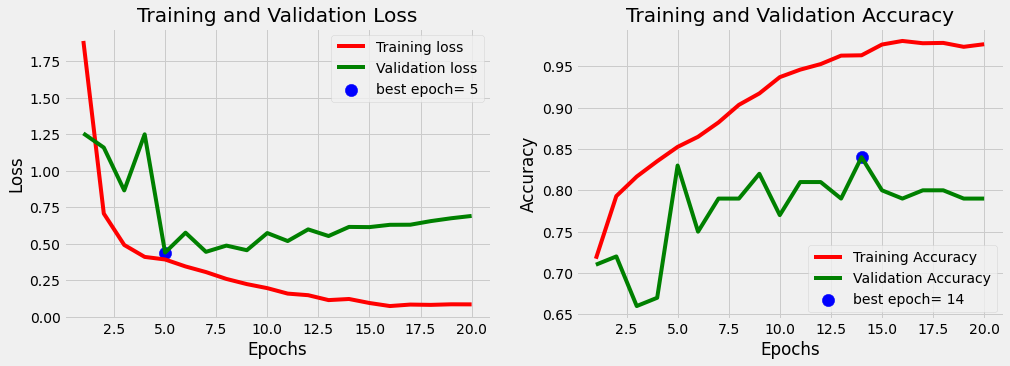

Training has completed. Now loading test set to see how accurate the model is
Model accuracy on Test Set is   83.67 %


In [ ]:
#reference/test.py 

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, load_model, Sequential
import numpy as np
import matplotlib.pyplot as plt
import time
import os

def get_paths(source_dir):
    test_path  = os.path.join(source_dir,'test')
    train_path = os.path.join(source_dir, 'train')
    valid_path = os.path.join(source_dir,'valid')
    classes = os.listdir(test_path)
    return [train_path, test_path, valid_path, classes]

def make_model(classes, lr_rate, height, width, model_size, rand_seed):
    size = len(classes)

    mobile = tf.keras.applications.mobilenet.MobileNet(include_top=True,
                                                       input_shape=(height,width,3),
                                                       pooling='avg', weights='imagenet',
                                                       alpha=1, depth_multiplier=1)

    x = mobile.layers[-6].output
    x = Dense(124, kernel_regularizer = regularizers.l2(l = 0.015), activation='relu')(x)
    x = Dropout(rate=.4, seed=rand_seed)(x)

    predictions = Dense(size, activation='softmax')(x)
    model = Model(inputs=mobile.input, outputs=predictions)
    for layer in model.layers:
        layer.trainable = True
    # for layer in model.layers[-80:]:
    #     layer.trainable=True


    model.compile(Adam(lr=lr_rate), loss='categorical_crossentropy', metrics=['accuracy'])
    print(model.summary())
    return model


def make_generators( paths, mode, batch_size, v_split, classes, height, width):
    file_names=[]
    labels=[]
    v_split=v_split/100.0

    train_gen=ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input,
            horizontal_flip=True,
            samplewise_center=True,
            width_shift_range=.2,
            height_shift_range=.2,
            validation_split=v_split,
            samplewise_std_normalization=True).flow_from_directory(
            paths[0],
            target_size=(height, width),
            batch_size=batch_size, seed=rand_seed)

    val_gen=ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input,
            samplewise_center=True,
            samplewise_std_normalization=True).flow_from_directory(
            paths[2],
            target_size=(height, width),
            batch_size=batch_size,
            seed=rand_seed,
            shuffle=False)

    test_gen=ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input,
            samplewise_center=True,
            samplewise_std_normalization=True).flow_from_directory(
            paths[1],
            target_size=(height, width),
            batch_size=batch_size,
            seed=rand_seed,
            shuffle=False)

    for file in test_gen.filenames:
        file_names.append(file)
    for label in test_gen.labels:
        labels.append(label)

    return [train_gen, test_gen, val_gen, file_names, labels]

def train(model, callbacks, train_gen, val_gen, epochs, start_epoch):
    start=time.time()
    data = model.fit_generator(
           generator = train_gen,
           validation_data= val_gen,
           epochs=epochs,
           initial_epoch=start_epoch,
           callbacks=callbacks,
           verbose=1)
    stop=time.time()

    duration = stop-start
    hrs=int(duration/3600)
    mins=int((duration-hrs*3600)/60)
    secs= duration-hrs*3600-mins*60
    msg='Training took\n {0} hours {1} minutes and {2:6.2f} seconds'
    print(msg.format(hrs, mins,secs))
    return data

def save_model(output_dir,subject, accuracy, height, width, model, weights):
    # save the model with the  subect-accuracy.h5
    acc=str(accuracy)[0:5]
    tempstr= subject + '-' + str(height) + '-' + str(width) + '-' + acc + '.h5'
    model.set_weights(weights)
    model_save_path = os.path.join(output_dir, tempstr)
    model.save(model_save_path)

def make_predictions(model, weights, test_gen, lr):
    config = model.get_config()
    pmodel = Model.from_config(config)  # copy of the model
    pmodel.set_weights(weights) #load saved weights with lowest validation loss
    pmodel.compile(Adam(lr=lr), loss='categorical_crossentropy', metrics=['accuracy'])
    print('Training has completed. Now loading test set to see how accurate the model is')
    results = pmodel.evaluate(test_gen, verbose=0)
    print('Model accuracy on Test Set is {0:7.2f} %'.format(results[1]* 100))
    predictions = pmodel.predict(test_gen, verbose=0)
    return predictions

def tr_plot(tacc,vacc,tloss,vloss):
    #Plot the training and validation data
    Epoch_count=len(tloss)
    Epochs=[]
    for i in range (0,Epoch_count):
        Epochs.append(i+1)
    index_loss=np.argmin(vloss)#  this is the epoch with the lowest validation loss
    val_lowest=vloss[index_loss]
    index_acc=np.argmax(vacc)
    val_highest=vacc[index_acc]
    plt.style.use('fivethirtyeight')
    sc_label='best epoch= '+ str(index_loss+1)
    vc_label='best epoch= '+ str(index_acc + 1)
    fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    axes[0].plot(Epochs,tloss, 'r', label='Training loss')
    axes[0].plot(Epochs,vloss,'g',label='Validation loss' )
    axes[0].scatter(index_loss+1,val_lowest, s=150, c= 'blue', label=sc_label)
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    axes[1].plot (Epochs,tacc,'r',label= 'Training Accuracy')
    axes[1].plot (Epochs,vacc,'g',label= 'Validation Accuracy')
    axes[1].scatter(index_acc+1,val_highest, s=150, c= 'blue', label=vc_label)
    axes[1].set_title('Training and Validation Accuracy')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()
    plt.tight_layout
    #plt.style.use('fivethirtyeight')
    plt.show()

def display_pred(output_dir, pred, file_names, labels, subject, model_size,classes):
    trials=len(labels)
    errors=0
    for i in range (0,trials):
        p_class=pred[i].argmax()
        if p_class != labels[i]: #if the predicted class is not the same as the test label it is an error
            errors=errors + 1

    accuracy=100*(trials-errors)/trials
    return accuracy

def TF2_classify(source_dir, output_dir, mode, subject, v_split=5, epochs=20, batch_size=80,
                 lr_rate=.002, height=224, width=224, rand_seed=128, model_size='L'):
    model_size=model_size.upper()
    height=224
    width=224
    mode=mode.upper()
    paths=get_paths(source_dir)
    gens=make_generators(paths, mode, batch_size, v_split, paths[3], height, width)
    model=make_model(paths[3], lr_rate, height, width, model_size, rand_seed)

    # Dynamic learning rate for batches
    class tr(tf.keras.callbacks.Callback):
        best_weights=model.get_weights()
        best_acc=0
        patience=10
        p_count=0
        focus='acc'

        def __init__(self):
            super(tr, self).__init__()
            self.best_acc = 0
            self.patience=10
            self.p_count=0

        def on_batch_end(self, batch, logs=None):
            epoch=logs.get('epoch')
            acc=logs.get('accuracy')
            if tr.best_acc > .9:
                if tr.focus=='acc':
                    tr.focus='val'
            else:
                if tr.best_acc<acc:
                    tr.best_acc=acc
                    tr.p_count=0
                    tr.best_weights=model.get_weights()

                else:
                    tr.p_count=tr.p_count + 1
                    if tr.p_count >= tr.patience:
                        tr.p_count=0
                        lr=float(tf.keras.backend.get_value(self.model.optimizer.lr))
                        new_lr=lr*.99
                        tf.keras.backend.set_value(self.model.optimizer.lr, new_lr)

    # Dynamic learning rate for epoches (Validaion)
    class val(tf.keras.callbacks.Callback):
        best_loss=np.inf
        best_weights=tr.best_weights
        lr=float(tf.keras.backend.get_value(model.optimizer.lr))

        def __init__(self):
            super(val, self).__init__()
            self.best_loss=np.inf
            self.best_weights=tr.best_weights
            self.lr=float(tf.keras.backend.get_value(model.optimizer.lr))

        def on_epoch_end(self, epoch, logs=None):
            v_loss=logs.get('val_loss')
            v_acc=logs.get('val_accuracy')

            if v_loss<val.best_loss:
                val.best_loss=v_loss
                val.best_weights=model.get_weights()
            else:
                if tr.focus=='val':
                        #validation loss did not improve at end of current epoch
                        lr=float(tf.keras.backend.get_value(self.model.optimizer.lr))
                        new_lr=lr * .7
                        tf.keras.backend.set_value(model.optimizer.lr, new_lr)
            val.lr=float(tf.keras.backend.get_value(model.optimizer.lr))

    callbacks=[tr(), val()]
    run_num=0
    tacc=[]
    tloss=[]
    vacc=[]
    vloss=[]
    start_epoch=0

    results = train(model, callbacks, gens[0], gens[2], epochs,start_epoch)

    # returns data from training the model - append the results for plotting
    tacc_new  = results.history['accuracy']
    tloss_new = results.history['loss']
    vacc_new  = results.history['val_accuracy']
    vloss_new = results.history['val_loss']
    for d in tacc_new:  # need to append new data from training to plot all epochs
        tacc.append(d)
    for d in tloss_new:
        tloss.append(d)
    for d in vacc_new:
        vacc.append(d)
    for d in vloss_new:
        vloss.append(d)

    tr_plot(tacc,vacc,tloss,vloss) # plot the data on loss and accuracy
    last_epoch=results.epoch[len(results.epoch)-1] # this is the last epoch run
    bestw=val.best_weights  # these are the saved weights with the lowest validation loss
    lr_rate=val.lr
    predictions=make_predictions(model, bestw, gens[1], lr_rate)
    accuracy=display_pred(output_dir, predictions, gens[3], gens[4], subject, model_size, paths[3])
    save_model(output_dir, subject, accuracy, height, width , model, bestw)


source_dir='/content/drive/MyDrive/Kaggle-Autism/'
output_dir='/content/drive/MyDrive/Kaggle-Autism/'
subject='autism'
v_split=8
epochs=20
batch_size=16
lr_rate=.0015
height=224
width=224
rand_seed=100
model_size='L'
mode='sep'

TF2_classify(source_dir, output_dir, mode,subject, v_split= v_split, epochs=epochs,batch_size= batch_size,
         lr_rate= lr_rate,height=height, width=width,rand_seed=rand_seed, model_size=model_size)

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Kaggle-Autism/autism-224-224-83.66.h5')
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img


def get_paths(source_dir):
    test_path  = os.path.join(source_dir,'test')
    train_path = os.path.join(source_dir, 'train')
    valid_path = os.path.join(source_dir,'valid')
    classes = os.listdir(test_path)
    return [train_path, test_path, valid_path, classes]
source_dir='/content/drive/MyDrive/Kaggle-Autism/'
height=224
width=224
batch_size=80
rand_seed=128

paths=get_paths(source_dir)
test_gen=ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input,
            samplewise_center=True,
            samplewise_std_normalization=True).flow_from_directory(
            paths[1],
            target_size=(height, width),
            batch_size=batch_size,
            seed=rand_seed,
            shuffle=False)


Y_pred = model.predict_generator(test_gen)
y_pred = np.argmax(Y_pred, axis=1)

Found 300 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print('Classification Report')
target_names = ['Autistic', 'Non_Autistic']
print(classification_report(test_gen.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

    Autistic       0.76      0.97      0.86       150
Non_Autistic       0.96      0.70      0.81       150

    accuracy                           0.84       300
   macro avg       0.86      0.84      0.83       300
weighted avg       0.86      0.84      0.83       300

